## Akash Shivaji Varude

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

np.random.seed(0)

#Change below four values to get different outputs
random_state=11
std_var1=1.0
std_var2=2.5
std_var3=0.5

### Create Dataset

In [2]:
n_samples = 500
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state,cluster_std=[std_var1, std_var2, std_var3],)
X = StandardScaler().fit_transform(X)


In [3]:
X0 = X[np.where(y == 0)]
X1 = X[np.where(y == 1)]
X2 = X[np.where(y == 2)]

### Calculate Means

In [4]:
means0 = np.mean(X0, axis=0)
means1 = np.mean(X1, axis=0)
means2 = np.mean(X2, axis=0)


### Calculate Covariances

In [5]:
X0_new = X0 - means0
X1_new = X1 - means1
X2_new = X2 - means2

cov0=X0_new.T @ X0_new / X0_new.shape[0]
cov1=X1_new.T @ X1_new / X1_new.shape[0]
cov2=X2_new.T @ X2_new / X2_new.shape[0]


### Model Training

In [6]:
gmm = mixture.GaussianMixture(
    n_components=3, covariance_type="full"
)
gmm.fit(X)
y_pred = gmm.predict(X)

C:\Users\nk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


### Scatter Plot

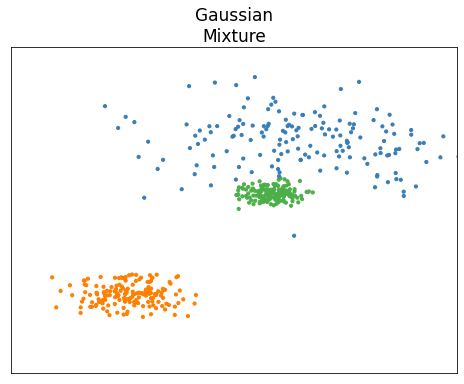

In [7]:
plt.figure(figsize=(8,6))
plt.title("Gaussian\nMixture", size=17)
colors = np.array(
        list(
            islice(
                cycle(
                    [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                    ]
                ),
                int(max(y_pred) + 1),
            )
        )
)
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
plt.show()

In [8]:
print('Sequence: 1, 0, 2 \n\n')
print("True Means :",means1, means0, means2)
print("Predicted_Means: ",gmm.means_)

Sequence: 1, 0, 2 


True Means : [0.75559662 1.03928923] [-1.17402888 -1.2889294 ] [0.42095294 0.25114403]
Predicted_Means:  [[ 0.7558673   1.04154111]
 [-1.17402889 -1.2889294 ]
 [ 0.42285426  0.25401886]]


In [9]:
print('Sequence: 1, 0, 2  \n\n')
print("True covariance: ", cov1,'\n\n', cov0,'\n\n', cov2,'\n\n')
print("Predicted Covariance: ", gmm.covariances_)

Sequence: 1, 0, 2  


True covariance:  [[ 0.73527736 -0.04720549]
 [-0.04720549  0.15766104]] 

 [[ 0.1019269  -0.00029818]
 [-0.00029818  0.02493694]] 

 [[0.03158649 0.00019285]
 [0.00019285 0.00730099]] 


Predicted Covariance:  [[[ 0.74108496 -0.04699152]
  [-0.04699152  0.15890399]]

 [[ 0.1019279  -0.00029818]
  [-0.00029818  0.02493794]]

 [[ 0.03092742  0.00041713]
  [ 0.00041713  0.00753385]]]
